<a href="https://colab.research.google.com/github/tundao912/Python_Projects/blob/master/stockpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import math
import datetime
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

In [125]:
%cd /content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks


In [141]:
#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01',end='2021-02-23')
df = pd.read_csv('mbb.csv')
df.columns = ['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volumn']
#df['NewDate'] = pd.to_datetime((df.Date).apply(str),format='%Y%m%d')
df.sort_values(by='Date', inplace=True, ascending=True)
df.reset_index(drop=True, inplace=True)
df

,Ticker,Date,Open,High,Low,Close,Volumn
0,MBB,20111101,4.8796,4.8796,4.6440,4.6440,2719290
1,MBB,20111102,4.5767,4.6440,4.4421,4.4421,1255220
2,MBB,20111103,4.3748,4.4421,4.2402,4.4084,1193910
3,MBB,20111104,4.4421,4.4421,4.3411,4.3411,483860
4,MBB,20111107,4.3411,4.3411,4.1392,4.1392,1158750
...,...,...,...,...,...,...,...
2319,MBB,20210219,26.8500,27.4000,25.8000,26.8500,30003300
2320,MBB,20210222,26.8500,27.1500,26.3000,26.7000,19791100
2321,MBB,20210223,26.7500,27.5000,26.6000,27.4000,31587900
2322,MBB,20210224,27.6500,27.8000,26.9000,27.0000,19888900


In [142]:
df.shape

(2324, 7)

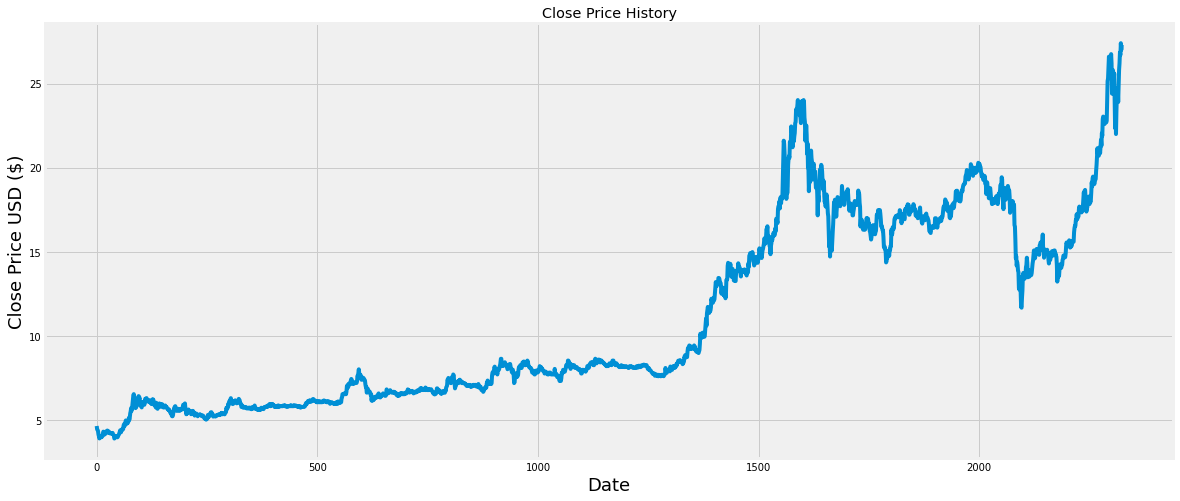

In [143]:
plt.figure(figsize=(18,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [144]:
data=df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset) * .8)
train_data_len

1860

In [145]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03170902],
       [0.02311797],
       [0.021684  ],
       ...,
       [1.        ],
       [0.98297959],
       [0.9957449 ]])

In [146]:
train_data = scaled_data[0:train_data_len, :]

x_train= []
y_train= []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.03170902, 0.02311797, 0.021684  , 0.01882032, 0.01022926,
       0.00593161, 0.00020424, 0.00306793, 0.00593161, 0.0045019 ,
       0.00306793, 0.0045019 , 0.0045019 , 0.00593161, 0.01165898,
       0.0173906 , 0.01595663, 0.01165898, 0.01022926, 0.01452692,
       0.0173906 , 0.01309295, 0.01595663, 0.01595663, 0.02025428,
       0.0173906 , 0.01896073, 0.01738209, 0.01422055, 0.01579919,
       0.01422055, 0.01264191, 0.01264191, 0.01264191, 0.01264191,
       0.01264191, 0.01422055, 0.01105901, 0.00948037, 0.00790172,
       0.        , 0.0015829 , 0.00474018, 0.00474018, 0.00631883,
       0.00631883, 0.00316154, 0.00316154, 0.00474018, 0.00790172,
       0.00948037, 0.01264191, 0.01579919, 0.02053938, 0.01579919,
       0.01579919, 0.02212227, 0.02053938, 0.02370092, 0.02527956])]
[0.02370091739996258]

[array([0.03170902, 0.02311797, 0.021684  , 0.01882032, 0.01022926,
       0.00593161, 0.00020424, 0.00306793, 0.00593161, 0.0045019 ,
       0.00306793, 0.0045019 , 0.00

In [147]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [148]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(1800, 60, 1)

In [149]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [150]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [151]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1800/1800 [==============================] - 49s 26ms/step - loss: 0.0024


In [152]:
test_data= scaled_data[train_data_len - 60 : , :]

x_test = []
y_test = dataset[train_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [153]:
x_test = np.array(x_test)

In [154]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [155]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [156]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

1.1124082673862064

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


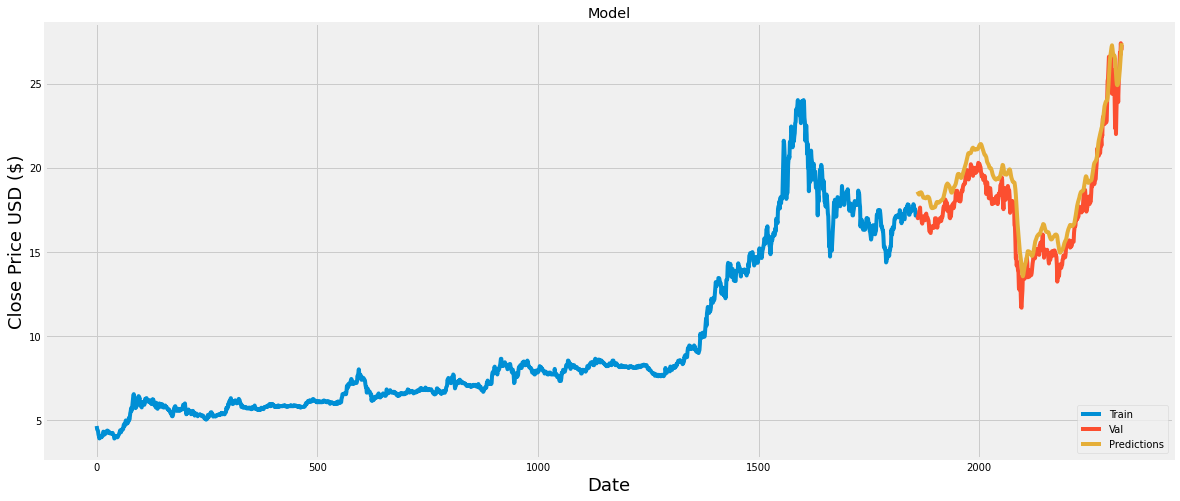

In [157]:
train = data[:train_data_len]
valid = data[train_data_len:]

valid["Predictions"] = predictions
plt.figure(figsize=(18,8))
plt.title("Model")
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()


In [158]:
valid

,Close,Predictions
1860,17.0732,18.576904
1861,16.9934,18.520327
1862,17.1530,18.458202
1863,17.1530,18.421637
1864,17.3923,18.399769
...,...,...
2319,26.8500,25.930744
2320,26.7000,26.349730
2321,27.4000,26.717438
2322,27.0000,27.110624


In [159]:
#apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01',end='2021-02-23')
new_df = pd.read_csv('mbb.csv')
new_df.columns = ['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volumn']
#df['NewDate'] = pd.to_datetime((df.Date).apply(str),format='%Y%m%d')
new_df.sort_values(by='Date', inplace=True, ascending=True)
new_df.reset_index(drop=True, inplace=True)
new_df = new_df.filter(['Close'])
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[27.658533]]


In [122]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-02-24',end='2021-02-24')
print(apple_quote2['Close'])


Date
2021-02-24    125.349998
2021-02-24    125.349998
Name: Close, dtype: float64
